# DATA EXPLORATION

## Importing necessary packages

We import different packages that can be usefull for the exploration of the Data, because they give us the ability to visulaize and plot the Data in a clear und easy way.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as seab
from sqlalchemy import create_engine

## Loading the Data from database

First we build up a connection to the 'data.sqlite' Database in which the Pipeline loads the Data from the sources.

Then we store the Data from the 6 tables in 6 Variables, so that we can work with them later.
The 5 Tables and so the Variables are:
- df1 : Bewohneranzahl_SH_LandKreise
- df2 : Schueleranzahl_SH_21_22
- df3 : Covid_Faelle_nach_Schultypen
- df4 : Impfungen_SH
- df5 : Impfungen_SH_LandKreise
- df6 : Covid_Faelle_an_Schulen_nach_Landkreisen

In [2]:
db_connection = create_engine('sqlite:///../data/data.sqlite')

table_names = ['Bewohneranzahl_SH_LandKreise', 'Schueleranzahl_SH_21_22', 'Covid_Faelle_nach_Schultypen', 'Impfungen_SH', 'Impfungen_SH_LandKreise', 'Covid_Faelle_an_Schulen_nach_Landkreisen']

df1 = pd.read_sql_table(table_names[0], db_connection, index_col='Schlüssel-nummer')
df2 = pd.read_sql_table(table_names[1], db_connection, index_col='Schulart')
df3 = pd.read_sql_table(table_names[2], db_connection, index_col='Datum')
df4 = pd.read_sql_table(table_names[3], db_connection, index_col='Impfdatum')
df5 = pd.read_sql_table(table_names[4], db_connection, index_col='Impfdatum')
df6 = pd.read_sql_table(table_names[5], db_connection, index_col='Datum')

## Exploring

### Dataframe 1: Number of People Living in Schleswig Holstein (devided by counties)

In [3]:
# An andere Dataframes (besonders df6) namentlich anpassen
special_countie_mapping = {
    'Herzogtum Lauenburg': 'Hzgt. Lauenburg',
    'Neumünster, Stadt': 'Neumünster',
    'Lübeck, Hansestadt': 'Lübeck',
    'Kiel, Landeshauptstadt': 'Kiel',
    'Flensburg, Stadt': 'Flensburg'
}

#anwenden des mappings, sodass auch nicht verwendete Namen beibehalten werden.
df1['Kreis / Landkreis'] = df1['Kreis / Landkreis'].map(special_countie_mapping).fillna(df1['Kreis / Landkreis'])

df1.head(15)

,Kreis / Landkreis,Bewohner
Schlüssel-nummer,,
1001,Flensburg,92550
1002,Kiel,247717
1003,Lübeck,218095
1004,Neumünster,79502
1051,Dithmarschen,135252
1053,Hzgt. Lauenburg,203712
1054,Nordfriesland,169043
1055,Ostholstein,203606
1056,Pinneberg,322130


### Dataframe 2: Number of pupil in Schleswig-Holstein in 2021/2022 (devided by Schooltypes)

In [4]:
df2.head(10)

,Schueler_innen_Anzahl
Schulart,
Insgesamt,292159
Grundschulen,105998
Gymnasien,75328
Integrierte Gesamtschulen,99763
Freie Waldorfschulen,4743
Förderschulen,6065
Abendgymnasien,262


Namen der Schulen ändern sodass sie zu denen in df3 passen:

In [5]:
# Mapping für die Änderung der Schularten
school_type_mapping = {
    'Insgesamt': 'Insgesamt',
    'Grundschulen': 'Grundschule',
    'Gymnasien': 'Gymnasium',
    'Integrierte Gesamtschulen': 'Gemeinschaftsschule',
    'Freie Waldorfschulen': 'Waldorfschule',
    'Förderschulen': 'Förderzentrum',
    'Abendgymnasien': 'Abendgymnasium'
}

# Anwendung des Mappings auf die Schularten in df2
df2.index = df2.index.map(school_type_mapping)

# Anzeige der aktualisierten Daten
df2.head(10)


,Schueler_innen_Anzahl
Schulart,
Insgesamt,292159
Grundschule,105998
Gymnasium,75328
Gemeinschaftsschule,99763
Waldorfschule,4743
Förderzentrum,6065
Abendgymnasium,262


### Dataframe 3: Covid Cases by School Types in Schleswig-Holstein

In [6]:
df3.head(10)

,Schulart,Anzahl
Datum,,
2022-03-01,Grundschule,240
2022-03-01,Förderzentrum,7
2022-03-01,Gemeinschaftsschule,162
2022-03-01,Waldorfschule,9
2022-03-01,Gymnasium,111
2022-03-01,Abendgymnasium,0
2022-03-01,Berufsbildende Schule,24
2022-02-28,Grundschule,303
2022-02-28,Förderzentrum,14


### Dataframe 4: Number of Covid-19 Vacinations in SH

In [7]:
df4.head(15)

,Anzahl
Impfdatum,
2020-12-27,808
2020-12-28,876
2020-12-29,2313
2020-12-30,1759
2020-12-31,1835
2021-01-01,688
2021-01-02,1199
2021-01-03,621
2021-01-04,3516


### Dataframe 5: Number of Covid-19 Vacinations in SH (divided by counties)

In [8]:
# Die LandkreisID in den Namen ändern um es an df6 anzupassen
landkreis_mapping = {
    '01001': 'Flensburg',
    '01002': 'Kiel',
    '01003': 'Lübeck',
    '01004': 'Neumünster',
    '01051': 'Dithmarschen',
    '01053': 'Hzgt. Lauenburg',
    '01054': 'Nordfriesland',
    '01055': 'Ostholstein',
    '01056': 'Pinneberg',
    '01057': 'Plön',
    '01058': 'Rendsburg-Eckernförde',
    '01059': 'Schleswig-Flensburg',
    '01060': 'Segeberg',
    '01061': 'Steinburg',
    '01062': 'Stormarn'
}

# Nach dem Schema mappen
df5['LandkreisId_Impfort'] = df5['LandkreisId_Impfort'].map(landkreis_mapping)

#'LandkreisId_Impfort zu 'Impfort' ändern, da es keine ID mehr ist
df5 = df5.rename(columns={'LandkreisId_Impfort': 'Impfort'})

df5.head(10)

,Impfort,Anzahl
Impfdatum,,
2021-01-15,Ostholstein,5
2021-01-18,Hzgt. Lauenburg,5
2021-01-20,Kiel,6
2021-01-22,Dithmarschen,5
2021-01-22,Segeberg,5
2021-01-25,Lübeck,5
2021-01-25,Nordfriesland,5
2021-01-25,Plön,7
2021-02-01,Schleswig-Flensburg,7


### Dataframe 6: Number of Covid-19 Cases on Schools (divided by counties)

In [9]:
df6.head(16)

,Kreis,Anzahl
Datum,,
2022-03-01,Flensburg,34
2022-03-01,Kiel,62
2022-03-01,Lübeck,29
2022-03-01,Neumünster,7
2022-03-01,Dithmarschen,29
2022-03-01,Hzgt. Lauenburg,13
2022-03-01,Nordfriesland,70
2022-03-01,Ostholstein,16
2022-03-01,Pinneberg,49


# Mixed and Combined

## Question 1: To what extent does the vaccination rate in Schleswig-Holstein correlate with COVID-19 case numbers in schools, categorized by school type.

We combine the Number of Covid Cases with the total number of Pupil in School Year 2021/22.

So we get the proportion of students that are sick at that moment.

In [10]:
# Mergen der beiden DataFrames basierend auf der Schulart und dem Datum
merged_df2_3 = pd.merge(df2, df3, left_index=True, right_on='Schulart')

# Nach dem Zusammenführen wieder nach Datum sortieren
merged_df2_3.sort_values(by='Datum', inplace=True)

# Filtern nach dem gewünschten Zeitbereich (nur wenn 'Datum' der Index ist)
merged_df2_3 = merged_df2_3.loc['2021-08-02':'2022-07-01']

# Berechnung des prozentualen Anteils an Covid-Fällen
merged_df2_3['Positive Tests (%)'] = (merged_df2_3['Anzahl'] / merged_df2_3['Schueler_innen_Anzahl']) * 100

# Umbenennung der Spalten
merged_df2_3.rename(columns={'Schueler_innen_Anzahl': 'Schueleranzahl', 'Anzahl': 'Positive Tests'}, inplace=True)

# Anzahl aller aktuell kranken Schüler nach Schulart berechnen (Annahme einer Krankheitsdauer von 14 Tagen)
merged_df2_3['Kranke Schüler (%)'] = merged_df2_3.groupby('Schulart')['Positive Tests (%)'].transform(lambda x: x.rolling(window=14, min_periods=1).sum())

# Anzeigen der ersten 10 Zeilen
merged_df2_3.head(10)


,Schueleranzahl,Schulart,Positive Tests,Positive Tests (%),Kranke Schüler (%)
Datum,,,,,
2021-08-02,4743,Waldorfschule,0,0.000000,0.000000
2021-08-02,262,Abendgymnasium,0,0.000000,0.000000
2021-08-02,6065,Förderzentrum,1,0.016488,0.016488
2021-08-02,75328,Gymnasium,17,0.022568,0.022568
2021-08-02,99763,Gemeinschaftsschule,25,0.025059,0.025059
2021-08-02,105998,Grundschule,19,0.017925,0.017925
2021-08-03,105998,Grundschule,11,0.010378,0.028302
2021-08-03,4743,Waldorfschule,0,0.000000,0.000000
2021-08-03,262,Abendgymnasium,0,0.000000,0.000000


 Now we visualize it (School year was from 02.08.2021 till 01.07.2022, we only have Covid data till 01.03.2022).

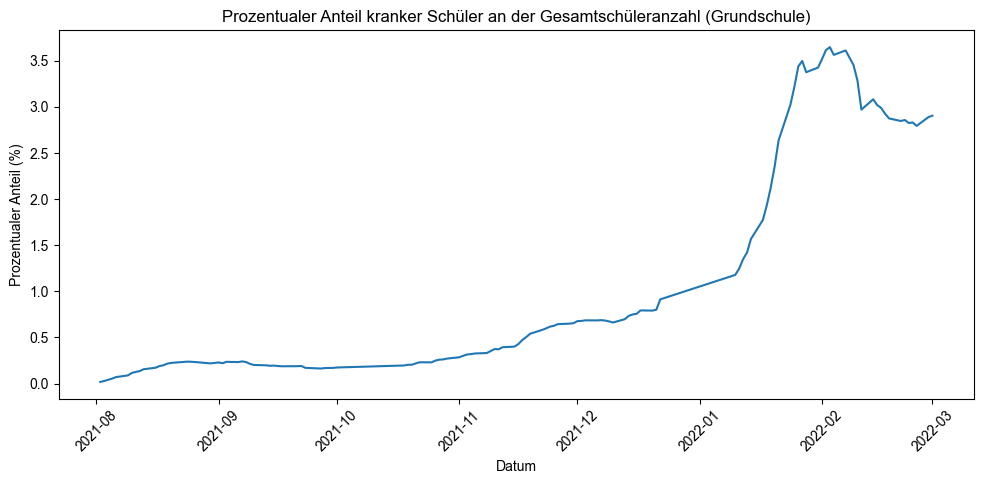

In [11]:
# Filtern nach 'Grundschule'
grundschule_data = merged_df2_3[merged_df2_3['Schulart'] == 'Grundschule']

# Erstellung des Zeitstrahls
plt.figure(figsize=(10, 5))
seab.lineplot(grundschule_data, x='Datum', y='Kranke Schüler (%)')
seab.set(style='whitegrid')
plt.title('Prozentualer Anteil kranker Schüler an der Gesamtschüleranzahl (Grundschule)')
plt.xlabel('Datum')
plt.ylabel('Prozentualer Anteil (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


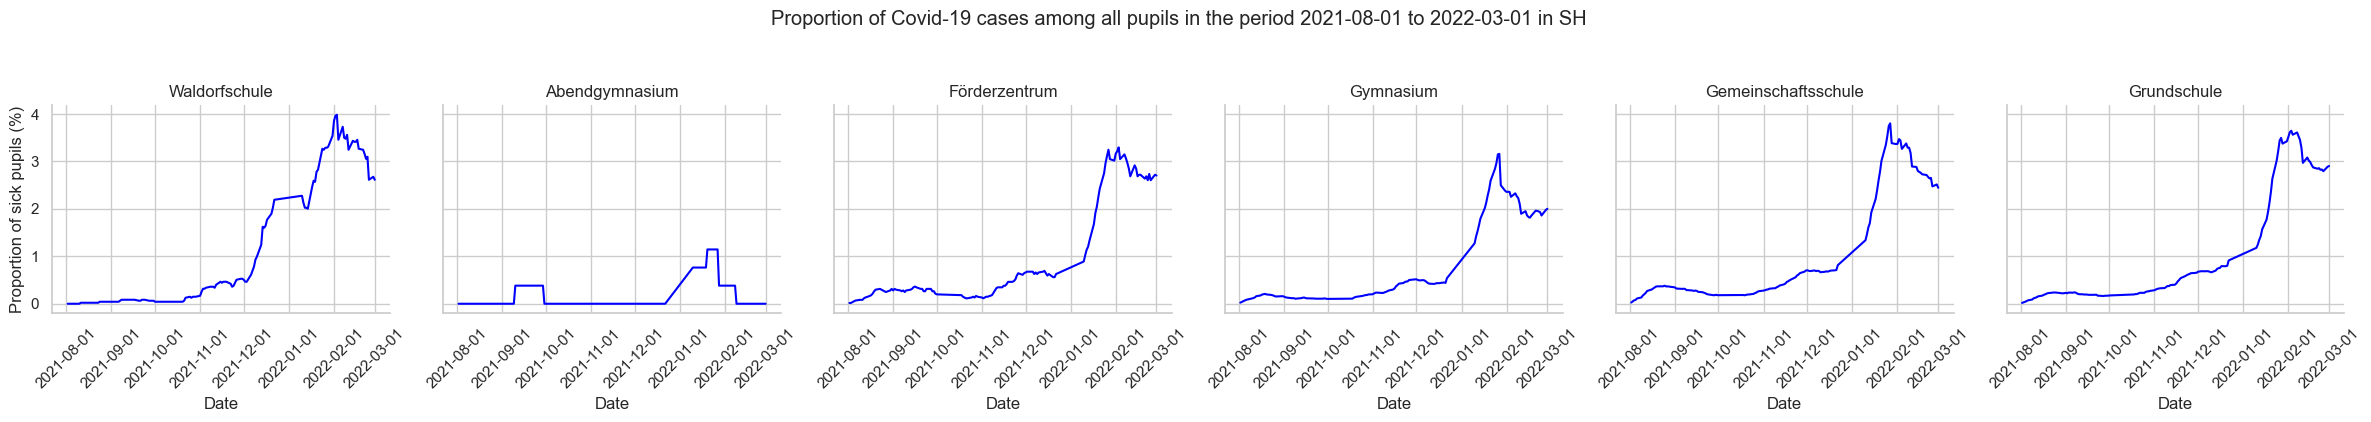

In [23]:
# Erstellung des Zeitstrahls für jeden Schultypen
plot = seab.FacetGrid(merged_df2_3, col='Schulart', col_wrap=6, height=4)
seab.set(style='whitegrid')
plot.map_dataframe(seab.lineplot, x='Datum', y='Kranke Schüler (%)', color='blue')
plot.set_axis_labels('Date', 'Proportion of sick pupils (%)')
plot.set_titles(col_template="{col_name}")
plot.set_xticklabels(rotation=45)

# Überschrift hinzufügen
plt.suptitle('Proportion of Covid-19 cases among all pupils in the period 2021-08-01 to 2022-03-01 in SH', y=1.05)


plt.tight_layout()
plt.show()

Again in one single Plot

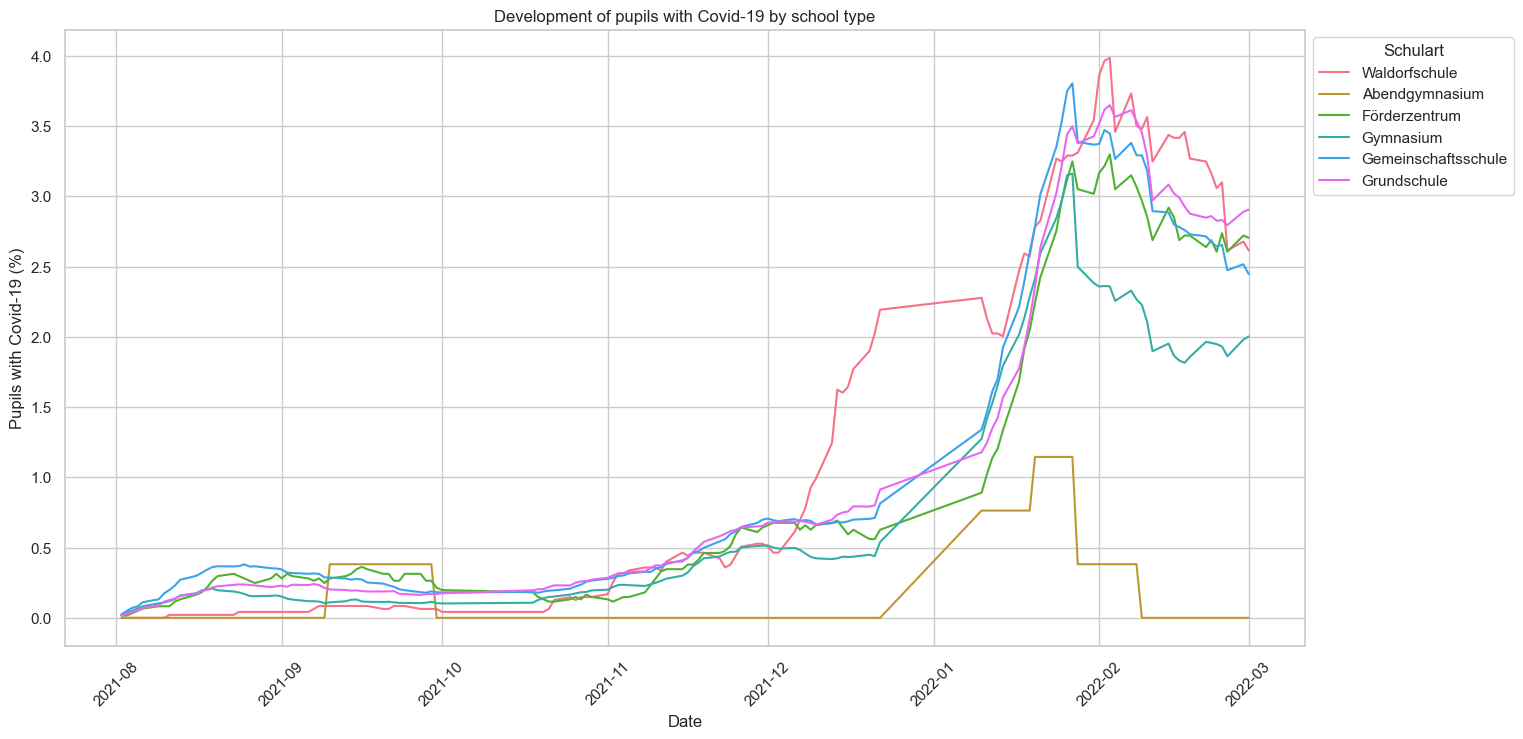

In [22]:
# Definieren einer individuellen Farbpalette für die Linien, da sie sonst alle gleich sind.
custom_palette = seab.color_palette("husl", n_colors=len(merged_df2_3['Schulart'].unique()))

# Stacked Area Chart für kranke Schüler (%) nach Schultyp
plt.figure(figsize=(16, 8))
seab.lineplot(x=merged_df2_3.index, y='Kranke Schüler (%)', hue='Schulart', data=merged_df2_3, palette=custom_palette, err_style=None)

plt.xlabel('Date')
plt.ylabel('Pupils with Covid-19 (%)')
plt.title('Development of pupils with Covid-19 by school type')

plt.legend(title='Schulart', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


Now that we have the proportion of sick pupil over the school year, we now merge it with the vaccination count.

For that we first need to get the portion for people in SH that are vaccinated.

In [14]:
# Annahme: Eine Impfung Schützt 12 Monate (12*30). Quelle:
# https://www.rki.de/SharedDocs/FAQ/COVID-Impfen/FAQ_Liste_Wirksamkeit.html#:~:text=Daten%20weisen%20darauf%20hin%2C%20dass,Erkrankung%20mindestens%2012%20Monate%20anh%C3%A4lt.

# Die Teilung basiert auf der aktuelsten bekannten Einwohnerzahl in SH
df4['Impfgeschützte (%)'] = df4['Anzahl'].rolling(window=12*30, min_periods=1).sum()/2897000


# Anzeige des aktualisierten DataFrame
df4.head(-10)


,Anzahl,Impfgeschützte (%)
Impfdatum,,
2020-12-27,808,0.000279
2020-12-28,876,0.000581
2020-12-29,2313,0.001380
2020-12-30,1759,0.001987
2020-12-31,1835,0.002620
...,...,...
2023-12-01,33,0.195368
2023-12-03,45005,0.210730
2023-12-04,76,0.210209


Now we plot it

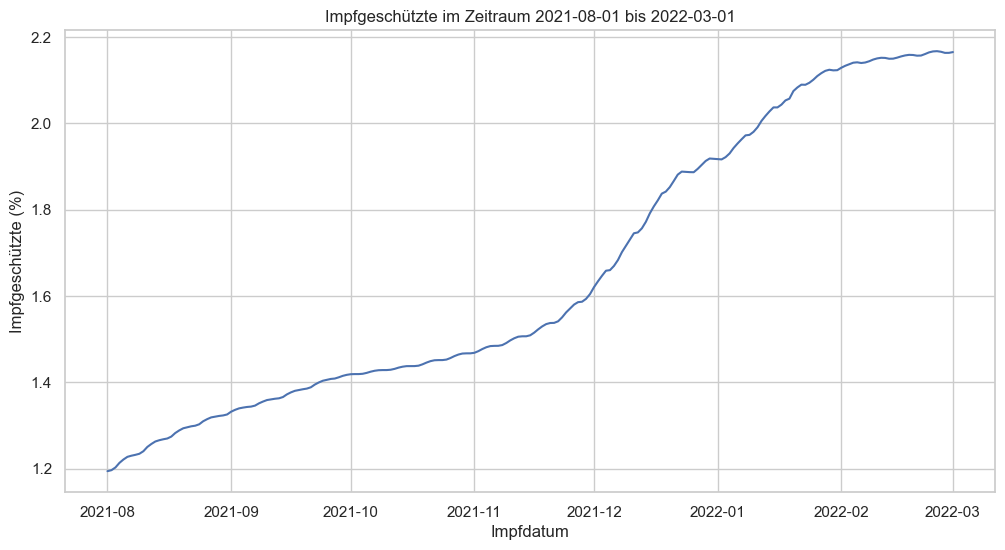

In [15]:
df4_timespan = df4[(df4.index >= '2021-08-01') & (df4.index <= '2022-03-01')]

plt.figure(figsize=(12, 6))  # Passen Sie die Größe des Plots nach Bedarf an
seab.lineplot(data=df4_timespan, x=df4_timespan.index, y='Impfgeschützte (%)', color='b')
seab.set(style='whitegrid')

plt.title('Impfgeschützte im Zeitraum 2021-08-01 bis 2022-03-01')
plt.xlabel('Impfdatum')
plt.ylabel('Impfgeschützte (%)')
plt.show()


Now we are going to add this plot into the Covid-19 case plot of all school types combined (the average) to maybe discover a Correlation 

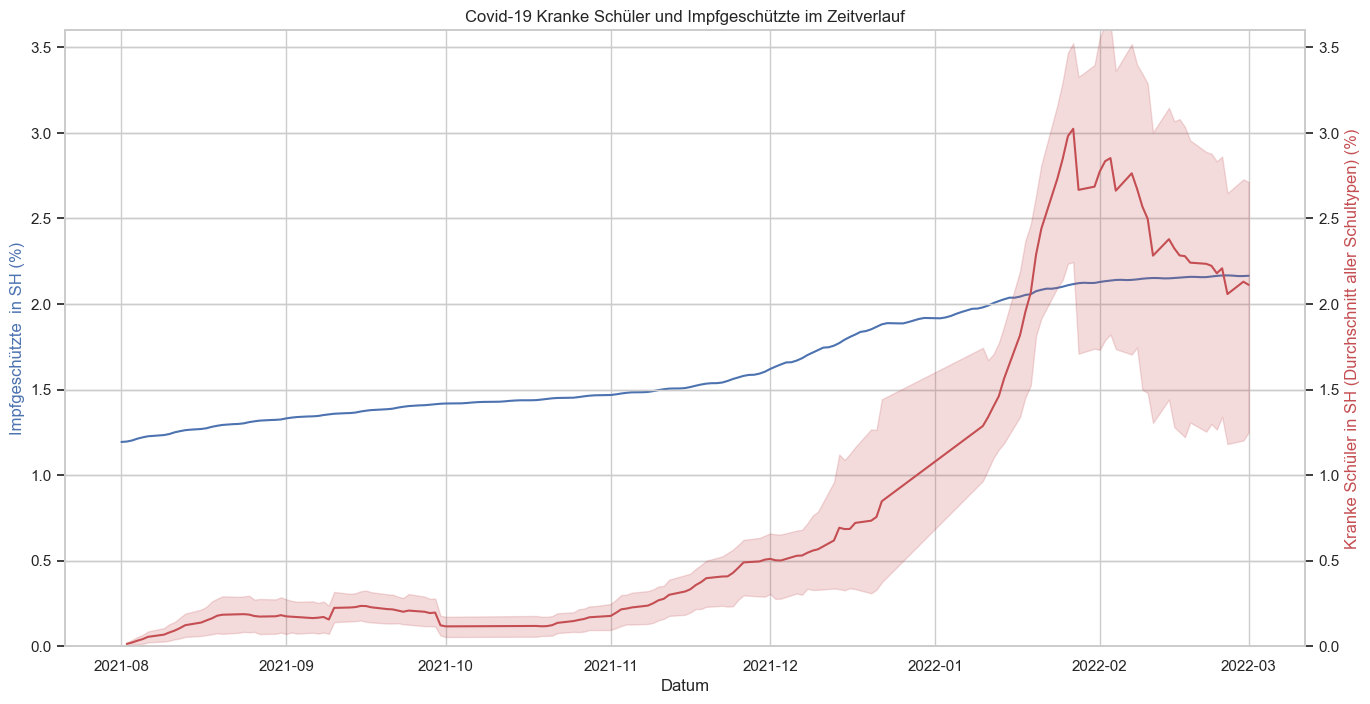

In [16]:
# Erstelle einen Plot
plt.figure(figsize=(16, 8))

# Plot für 'Impfgeschützte'
seab.lineplot(data=df4_timespan, x=df4_timespan.index, y='Impfgeschützte (%)', color='b')
plt.ylim(0, 3.6) 
plt.ylabel('Impfgeschützte  in SH (%)', color='b')
plt.xlabel('Datum')
plt.title('Covid-19 Kranke Schüler und Impfgeschützte im Zeitverlauf')

# Erstelle eine zweite y-Achse
ax2 = plt.twinx()

# Plot für 'Kranke Schüler'
seab.lineplot(data=merged_df2_3, x=merged_df2_3.index, y='Kranke Schüler (%)', color='r')
ax2.set_ylim(0, 3.6)
ax2.set_ylabel('Kranke Schüler in SH (Durchschnitt aller Schultypen) (%)', color='r')

plt.show()



## Question 2: Are there significant differences in this correlation among various regions in SH?

We first need to combine the Dataframes 5 and 6.

In [17]:
# Anzahl in df6 passend umbennen, da es mehrere Anzahlen geben wird.
df6.rename(columns={'Anzahl': 'Neue kranke Schüler'}, inplace=True)

# df6 als Basis des neuen merged_df nehmen und Indizes zurücksetzen vor dem mergen damit sie nicht entfernt werden.
# Daraufhin noch die Daten Chronologisch aufsteigend sortieren.
merged_df6_5_1 = df6
merged_df6_5_1.reset_index(inplace=True, drop=False)
merged_df6_5_1.sort_values(by= 'Datum', ascending= True, inplace= True)

# Mergen mit df5 und df1 und den Index wieder auf Datum setzen
merged_df6_5_1 = pd.merge(merged_df6_5_1, df5, left_on=['Datum', 'Kreis'], right_on=['Impfdatum', 'Impfort'], how='left')
merged_df6_5_1 = pd.merge(merged_df6_5_1, df1[['Kreis / Landkreis', 'Bewohner']], left_on='Kreis', right_on='Kreis / Landkreis', how='left')
merged_df6_5_1.set_index('Datum', inplace=True)

# Zum besseren Verständnis wird 'Anzahl' in 'Geimpfte Menschen' umbennant und der Impfort entfernt, da er Identisch zum Kreis ist.
# Fehlende Werte werden zu 0, daduch kann 'Geimpfte Menschen' wieder als Integer angezeigt werden. (geht nicht mit NaN werten)
merged_df6_5_1.rename(columns={'Anzahl': 'Neue geimpfte Leute'}, inplace=True)
merged_df6_5_1.drop(['Kreis / Landkreis', 'Impfort'], axis=1, inplace=True)
merged_df6_5_1.fillna(0, inplace=True)
merged_df6_5_1['Neue geimpfte Leute'] = merged_df6_5_1['Neue geimpfte Leute'].astype(int)

#Die Daten ab dem 1.5.2021 beschränken, weil erst ab dann valide Daten zu finden sind in beiden Datenreihen.
merged_df6_5_1 = merged_df6_5_1[merged_df6_5_1.index >= '2021-05-01']


merged_df6_5_1.head(-16)


,Kreis,Neue kranke Schüler,Neue geimpfte Leute,Bewohner
Datum,,,,
2021-05-03,Flensburg,2,10,92550
2021-05-03,Kiel,3,6,247717
2021-05-03,Lübeck,6,0,218095
2021-05-03,Neumünster,1,0,79502
2021-05-03,Dithmarschen,3,14,135252
...,...,...,...,...
2022-02-28,Rendsburg-Eckernförde,90,76,278979
2022-02-28,Schleswig-Flensburg,65,173,206038
2022-02-28,Segeberg,56,41,284988


Now we add the total count of sick people and vaccinated people over time in each countie 

We assume here again that the sickness time is 14 days and vaccination protection holds for one year.

In [18]:
# Die Zwei neuen Spalten als Integer hinzufügen
merged_df6_5_1['Kranke Schüler'] = merged_df6_5_1.groupby('Kreis')['Neue kranke Schüler'].transform(lambda x: x.rolling(window=14, min_periods=1).sum().astype(int))
merged_df6_5_1['Impfgeschützte'] = merged_df6_5_1.groupby('Kreis')['Neue geimpfte Leute'].transform(lambda x: x.rolling(window=12*30, min_periods=1).sum().astype(int))

merged_df6_5_1.head(16)

,Kreis,Neue kranke Schüler,Neue geimpfte Leute,Bewohner,Kranke Schüler,Impfgeschützte
Datum,,,,,,
2021-05-03,Flensburg,2,10,92550,2,10
2021-05-03,Kiel,3,6,247717,3,6
2021-05-03,Lübeck,6,0,218095,6,0
2021-05-03,Neumünster,1,0,79502,1,0
2021-05-03,Dithmarschen,3,14,135252,3,14
2021-05-03,Hzgt. Lauenburg,8,11,203712,8,11
2021-05-03,Nordfriesland,0,7,169043,0,7
2021-05-03,Ostholstein,6,0,203606,6,0
2021-05-03,Plön,1,0,131266,1,0


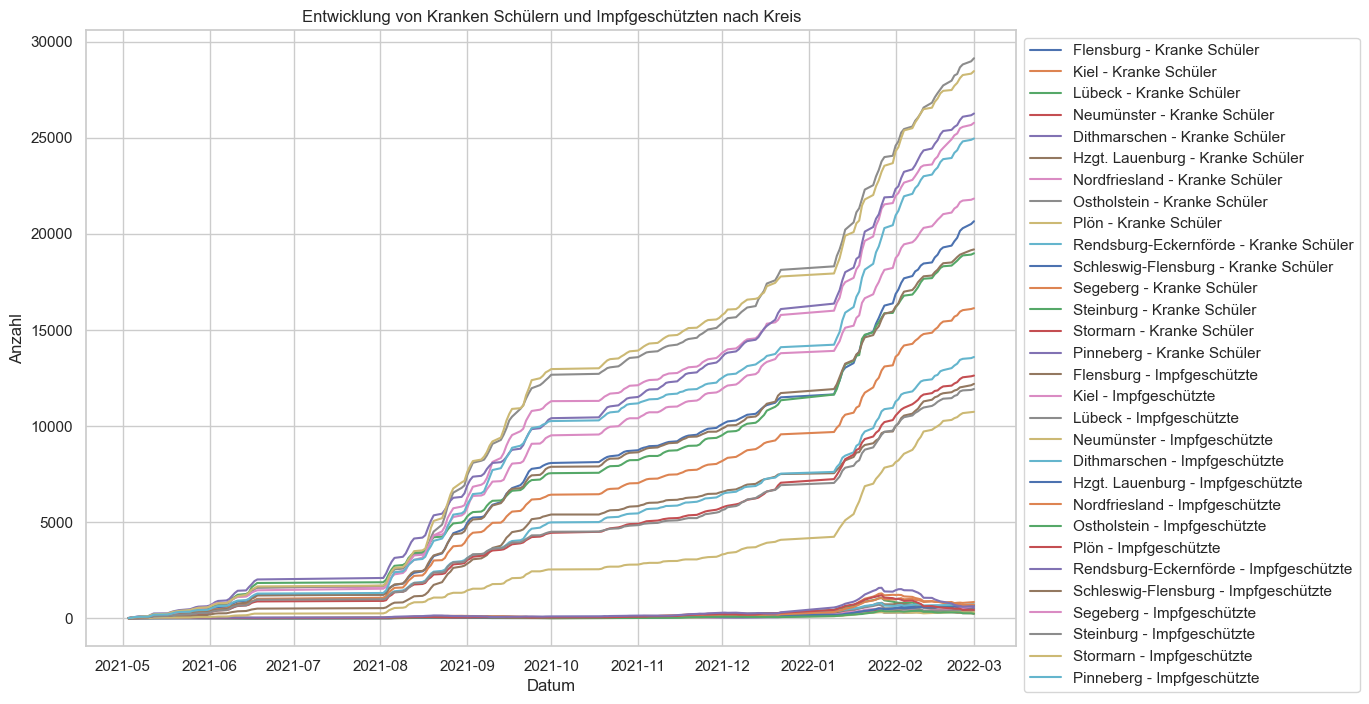

In [19]:
# Extrahieren Sie die einzigartigen Kreise im DataFrame
kreise = merged_df6_5_1['Kreis'].unique()

# Erstellen Sie einen Lineplot für jeden Kreis
plt.figure(figsize=(12, 8))

for kreis in kreise:
    kreis_df = merged_df6_5_1[merged_df6_5_1['Kreis'] == kreis]
    seab.lineplot(x=kreis_df.index, y='Kranke Schüler', data=kreis_df, label=f'{kreis} - Kranke Schüler')

for kreis in kreise:
    kreis_df = merged_df6_5_1[merged_df6_5_1['Kreis'] == kreis]
    seab.lineplot(x=kreis_df.index, y='Impfgeschützte', data=kreis_df, label=f'{kreis} - Impfgeschützte')

plt.title('Entwicklung von Kranken Schülern und Impfgeschützten nach Kreis')
plt.xlabel('Datum')
plt.ylabel('Anzahl')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

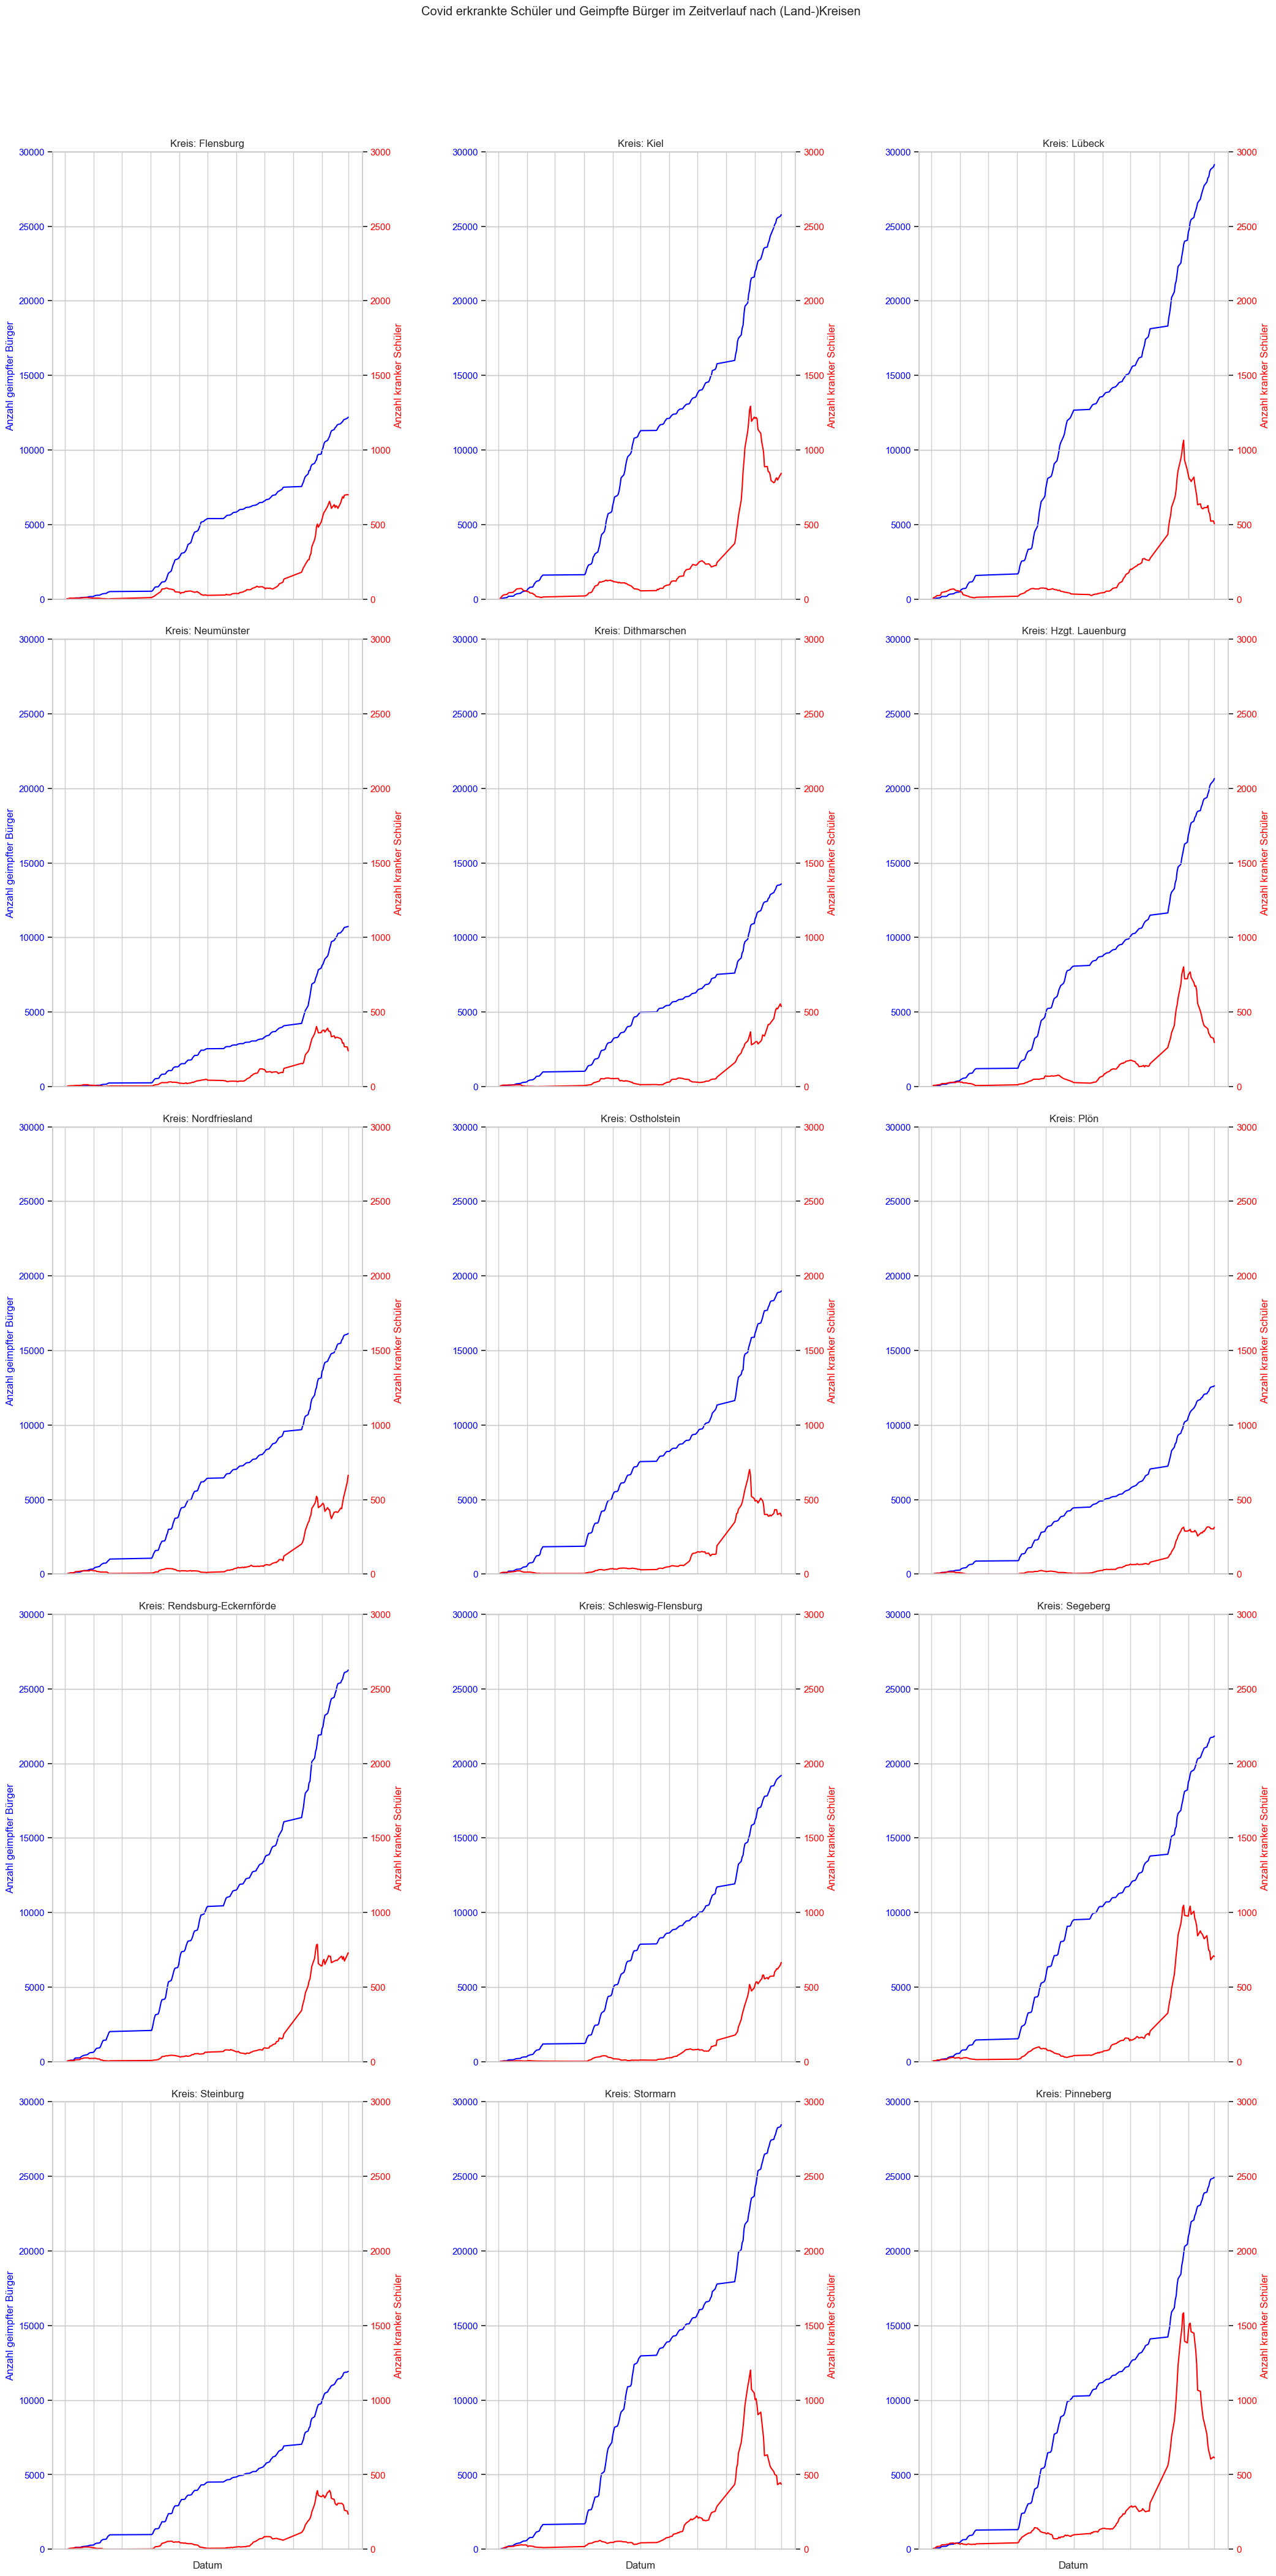

In [20]:
# Ein FacetGrid für jeden Kreis erstellen und Abstände der plots einstellen
g = seab.FacetGrid(merged_df6_5_1, col='Kreis', col_wrap=3, height=8)
g.fig.subplots_adjust(left=0.1, right=0.9, wspace=0.4)

# Iteriere über die FacetGrids für jeden Kreis
for kreis, ax in zip(merged_df6_5_1['Kreis'].unique(), g.axes):
    kreis_df = merged_df6_5_1[merged_df6_5_1['Kreis'] == kreis]
    
    # Erste y-Achse für den blauen Zeitstrahl links
    ax_blue = ax
    ax_blue.set_ylabel('Anzahl geimpfter Bürger', color='blue')
    ax_blue.tick_params(axis='y', labelcolor='blue')
    ax_blue.set_ylim(0, 30000)
    
    # Zweite y-Achse für den roten Zeitstrahl rechts
    ax_red = ax_blue.twinx()
    ax_red.spines['right'].set_position(('outward', 0)) 
    ax_red.set_ylabel('Anzahl kranker Schüler', color='red')
    ax_red.tick_params(axis='y', labelcolor='red')
    ax_red.set_ylim(0, 3000)

    # Blaue Linie auf erster y-Achse
    seab.lineplot(x=kreis_df.index, y=kreis_df['Impfgeschützte'], color='blue', ax=ax_blue)
    
    # Rote Linie auf zweiter y-Achse
    seab.lineplot(x=kreis_df.index, y=kreis_df['Kranke Schüler'], color='red', ax=ax_red)

    # Setze die Achsentitel
    ax.set_title(f'Kreis: {kreis}')

# Gemeinsame Einstellungen für alle FacetGrids
g.set_axis_labels('Datum')
g.set_xticklabels(rotation=45)

# Überschrift hinzufügen
plt.suptitle('Covid erkrankte Schüler und Geimpfte Bürger im Zeitverlauf nach (Land-)Kreisen', y=1.05)

plt.show()


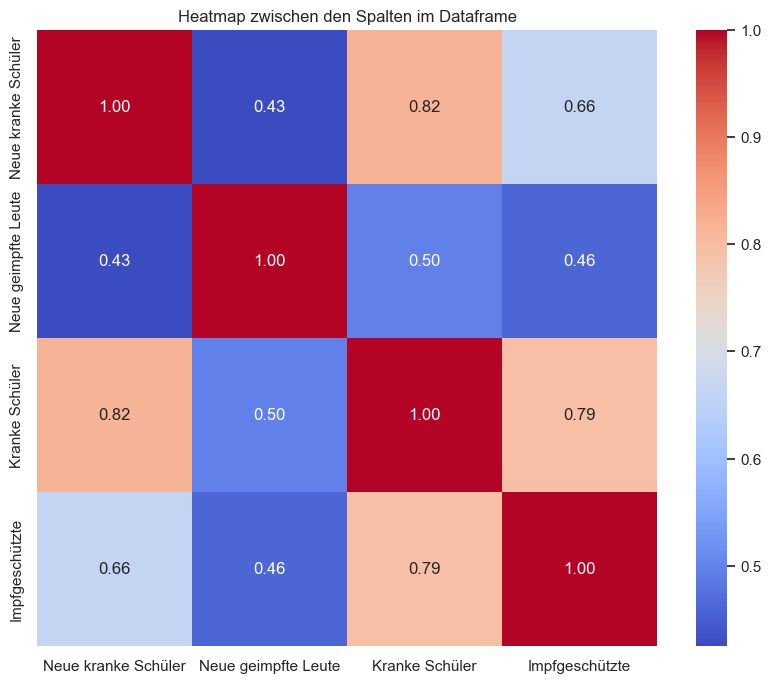

In [21]:
# Spalten auswählen
selected_columns = ['Neue kranke Schüler', 'Neue geimpfte Leute', 'Kranke Schüler', 'Impfgeschützte']

# Heatmap erstellen
plt.figure(figsize=(10, 8))  # Festlegen der Größe der Heatmap

# Verwenden Sie seaborn zur Erstellung der Heatmap mit den ausgewählten Spalten
seab.heatmap(merged_df6_5_1[selected_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Titel und Achsentitel hinzufügen
plt.title('Heatmap zwischen den Spalten im Dataframe')

# Heatmap anzeigen
plt.show()